<a href="https://colab.research.google.com/github/AlanAea07/Project1/blob/main/AvlCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Recorrido preorden del árbol AVL:
20 10 5 15 30 25 35 



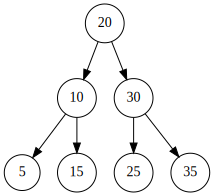

In [5]:
!apt-get install graphviz
!pip install graphviz

from graphviz import Digraph

class NodoAVL:
    def __init__(self, clave): # Changed init to __init__
        self.clave = clave
        self.izquierda = None
        self.derecha = None
        self.altura = 1

# ... (rest of the code remains the same) ...

class ArbolAVL:
    def obtener_altura(self, nodo):
        if not nodo:
            return 0
        return nodo.altura

    def obtener_balance(self, nodo):
        if not nodo:
            return 0
        return self.obtener_altura(nodo.izquierda) - self.obtener_altura(nodo.derecha)

    def rotar_derecha(self, y):
        x = y.izquierda
        T2 = x.derecha


        x.derecha = y
        y.izquierda = T2


        y.altura = max(self.obtener_altura(y.izquierda), self.obtener_altura(y.derecha)) + 1
        x.altura = max(self.obtener_altura(x.izquierda), self.obtener_altura(x.derecha)) + 1

        return x

    def rotar_izquierda(self, x):
        y = x.derecha
        T2 = y.izquierda


        y.izquierda = x
        x.derecha = T2


        x.altura = max(self.obtener_altura(x.izquierda), self.obtener_altura(x.derecha)) + 1
        y.altura = max(self.obtener_altura(y.izquierda), self.obtener_altura(y.derecha)) + 1

        return y

    def insertar(self, nodo, clave):

        if not nodo:
            return NodoAVL(clave)
        elif clave < nodo.clave:
            nodo.izquierda = self.insertar(nodo.izquierda, clave)
        else:
            nodo.derecha = self.insertar(nodo.derecha, clave)


        nodo.altura = max(self.obtener_altura(nodo.izquierda), self.obtener_altura(nodo.derecha)) + 1

        balance = self.obtener_balance(nodo)


        if balance > 1 and clave < nodo.izquierda.clave:
            return self.rotar_derecha(nodo)


        if balance < -1 and clave > nodo.derecha.clave:
            return self.rotar_izquierda(nodo)


        if balance > 1 and clave > nodo.izquierda.clave:
            nodo.izquierda = self.rotar_izquierda(nodo.izquierda)
            return self.rotar_derecha(nodo)


        if balance < -1 and clave < nodo.derecha.clave:
            nodo.derecha = self.rotar_derecha(nodo.derecha)
            return self.rotar_izquierda(nodo)

        return nodo

    def preorden(self, nodo):
        if not nodo:
            return
        print(nodo.clave, end=" ")
        self.preorden(nodo.izquierda)
        self.preorden(nodo.derecha)


    def graficar(self, nodo, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')

        if nodo:
            dot.node(str(nodo.clave), str(nodo.clave))

            if nodo.izquierda:
                dot.edge(str(nodo.clave), str(nodo.izquierda.clave))
                self.graficar(nodo.izquierda, dot)

            if nodo.derecha:
                dot.edge(str(nodo.clave), str(nodo.derecha.clave))
                self.graficar(nodo.derecha, dot)

        return dot


avl = ArbolAVL()
raiz = None


valores = [20, 10, 30, 5, 15, 25, 35]
for valor in valores:
    raiz = avl.insertar(raiz, valor)


print("Recorrido preorden del árbol AVL:")
avl.preorden(raiz)
print("\n")


dot = avl.graficar(raiz)
dot.render('arbol_avl', format='png', cleanup=True)
dot